In [127]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
# had to take out a malformed line
path = "data.csv"

In [3]:
df = pd.read_csv(path,error_bad_lines=False)

b'Skipping line 209: expected 23 fields, saw 25\nSkipping line 276: expected 23 fields, saw 25\nSkipping line 277: expected 23 fields, saw 25\nSkipping line 280: expected 23 fields, saw 25\nSkipping line 285: expected 23 fields, saw 25\nSkipping line 293: expected 23 fields, saw 25\nSkipping line 297: expected 23 fields, saw 25\nSkipping line 304: expected 23 fields, saw 25\nSkipping line 313: expected 23 fields, saw 25\nSkipping line 330: expected 23 fields, saw 25\nSkipping line 337: expected 23 fields, saw 25\nSkipping line 342: expected 23 fields, saw 25\nSkipping line 344: expected 23 fields, saw 25\nSkipping line 348: expected 23 fields, saw 25\nSkipping line 357: expected 23 fields, saw 25\nSkipping line 361: expected 23 fields, saw 25\nSkipping line 380: expected 23 fields, saw 25\nSkipping line 381: expected 23 fields, saw 25\nSkipping line 383: expected 23 fields, saw 25\nSkipping line 421: expected 23 fields, saw 25\nSkipping line 427: expected 23 fields, saw 25\nSkipping li

b'Skipping line 932289: expected 25 fields, saw 27\n'
b'Skipping line 1016603: expected 25 fields, saw 27\n'
b'Skipping line 1020574: expected 25 fields, saw 27\n'
b'Skipping line 1078293: expected 25 fields, saw 27\n'
b'Skipping line 1083422: expected 25 fields, saw 27\nSkipping line 1093800: expected 25 fields, saw 27\n'
b'Skipping line 1128972: expected 25 fields, saw 27\nSkipping line 1138003: expected 25 fields, saw 27\n'
b'Skipping line 1228495: expected 25 fields, saw 27\nSkipping line 1242864: expected 25 fields, saw 27\n'
/home/felipe/tf-venv3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (8,9,10,11,16,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [133]:
df.head()

ID Case.Number                    Date Block  \
10060004  HY248774  2015-05-05         010XX W 79TH ST  0460   
10059982  HY248801  2015-05-05      105XX S WABASH AVE  0420   
10059953  HY248791  2015-05-05     005XX N ASHLAND AVE  2027   
10060015  HY248790  2015-05-05  005XX N MARSHFIELD AVE  0275   
10059944  HY248782  2015-05-05         0000X E 72ND ST  2024   

                         IUCR                    Primary.Type Description  \
10060004              BATTERY                          SIMPLE    SIDEWALK   
10059982              BATTERY  AGGRAVATED:KNIFE/CUTTING INSTR   RESIDENCE   
10059953            NARCOTICS                     POSS: CRACK    SIDEWALK   
10060015  CRIM SEXUAL ASSAULT              ATTEMPT AGG: OTHER       ALLEY   
10059944            NARCOTICS             POSS: HEROIN(WHITE)      STREET   

         Location.Description Arrest Domestic Beat  District  Ward  \
10060004                False  False      612    6      17.0  71.0   
10059982                False  False      512    5       9.0  49.0   
10059953                 True  False     1215   13      26.0  24.0   
10060015                False  False     1215   13      26.0  24.0   
10059944                 True  False      323    3       6.0  69.0   

         Community.Area   FBI.Code X.Coordinate  Y.Coordinate  \
10060004            08B  1170778.0  1.85248e+06        2015.0   
10059982            04B  1178485.0  1.83491e+06        2015.0   
10059953             18  1165594.0  1.90371e+06        2015.0   
10060015             02  1165337.0  1.90384e+06        2015.0   
10059944             18  1178073.0  1.85726e+06        2015.0   

                        Year Updated.On Latitude      Longitude  \
10060004 2015-05-12 12:42:01    41.7507 -87.6498   (41.75066697   
10059982 2015-05-12 12:42:01    41.7023  -87.622  (41.702292131   
10059953 2015-05-12 12:42:01    41.8914 -87.6673  (41.891381064   
10060015 2015-05-12 12:42:01    41.8917 -87.6682   (41.89174052   
10059944 2015-05-12 12:42:01    41.7636 -87.6229  (41.763624424   

                 Location  
10060004   -87.649760051)  
10059982   -87.622049984)  
10059953    -87.66730127)  
10060015   -87.668241434)  
10059944   -87.622883163)

In [57]:
# all column names
list(df)

['ID',
 'Case.Number',
 'Date',
 'Block',
 'IUCR',
 'Primary.Type',
 'Description',
 'Location.Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community.Area',
 'FBI.Code',
 'X.Coordinate',
 'Y.Coordinate',
 'Year',
 'Updated.On',
 'Latitude',
 'Longitude',
 'Location']

In [6]:
# statistics for numeric features
df.describe(include=[np.number])

District          Ward      FBI.Code  Y.Coordinate
count  1.345016e+06  1.344642e+06  1.338409e+06  1.344921e+06
mean   5.654000e+01  3.684159e+01  1.128536e+06  3.800162e+04
std    2.265785e+02  2.169541e+01  2.019412e+05  2.032392e+05
min    1.000000e+00  0.000000e+00  1.000000e+00  2.011000e+03
25%    1.100000e+01  2.200000e+01  1.151252e+06  2.011000e+03
50%    2.400000e+01  3.100000e+01  1.165234e+06  2.013000e+03
75%    3.500000e+01  5.600000e+01  1.176156e+06  2.014000e+03
max    2.535000e+03  7.700000e+01  1.205079e+06  1.945412e+06

In [7]:
# statistics for categorical features
df.describe(include=[object])

ID Case.Number              Date    Block     IUCR Primary.Type  \
count    1345047     1345047           1345047  1345047  1345047      1345047   
unique   1344973        1586             32134      363       33          336   
top     HV217424  2011-01-01  001XX N STATE ST     0820    THEFT       SIMPLE   
freq           3        1453              2811   122660   300101       136521   

       Description Location.Description   Arrest Domestic     Beat  \
count      1344251              1345047  1345047  1345047  1338384   
unique         134                   38       48      579      166   
top         STREET                false    false    false       11   
freq        306616               918257  1081737    30076    86504   

       Community.Area X.Coordinate                    Year Updated.On  \
count         1345047      1338425                 1344807    1338428   
unique             77       147563                  933556     617578   
top                06          08B  10/31/2014 03:20:56 PM       2011   
freq           291533        10420                   18176      11982   

             Latitude      Longitude         Location  
count         1338425        1338302          1338302  
unique         646994         609509           609280  
top     -87.741385133  (41.754644364   -87.741385133)  
freq             1010           1062             1062

In [15]:
# how many crimes per year?

# some rows have bad dates so we must use coerce to force a NaT value
df["Year"] = pd.to_datetime(df['Year'], format='%m/%d/%Y %H:%M:%S %p',errors='coerce')

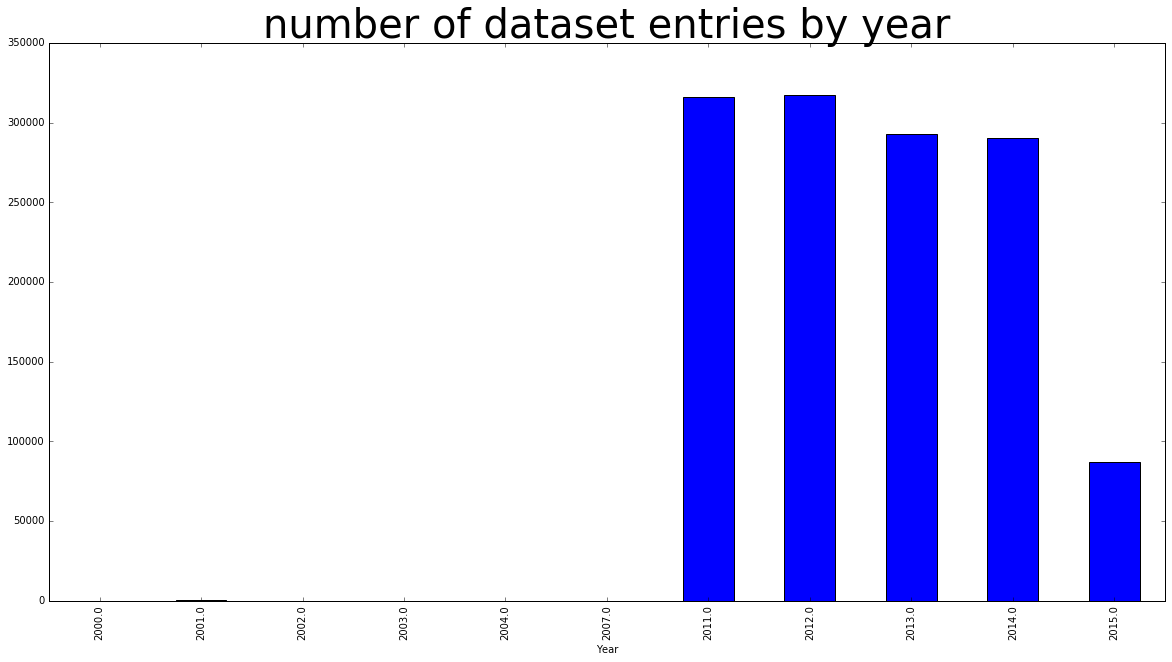

In [19]:
df["Year"].groupby([df.Year.dt.year]).size().plot(kind="bar",figsize=(20,10), title="number of dataset entries by year")
fig = plt.gcf()
fig.axes[0].title.set_size(40)

In [18]:
# looks like crime is going down. If the population is increasing, this drop is even more significant


# 2015 has had fewer crimes, but maybe we just stopped collecting data in the middle of the year
df["Year"].max()
# yes - last date was may 2015

Timestamp('2015-05-12 12:42:01')

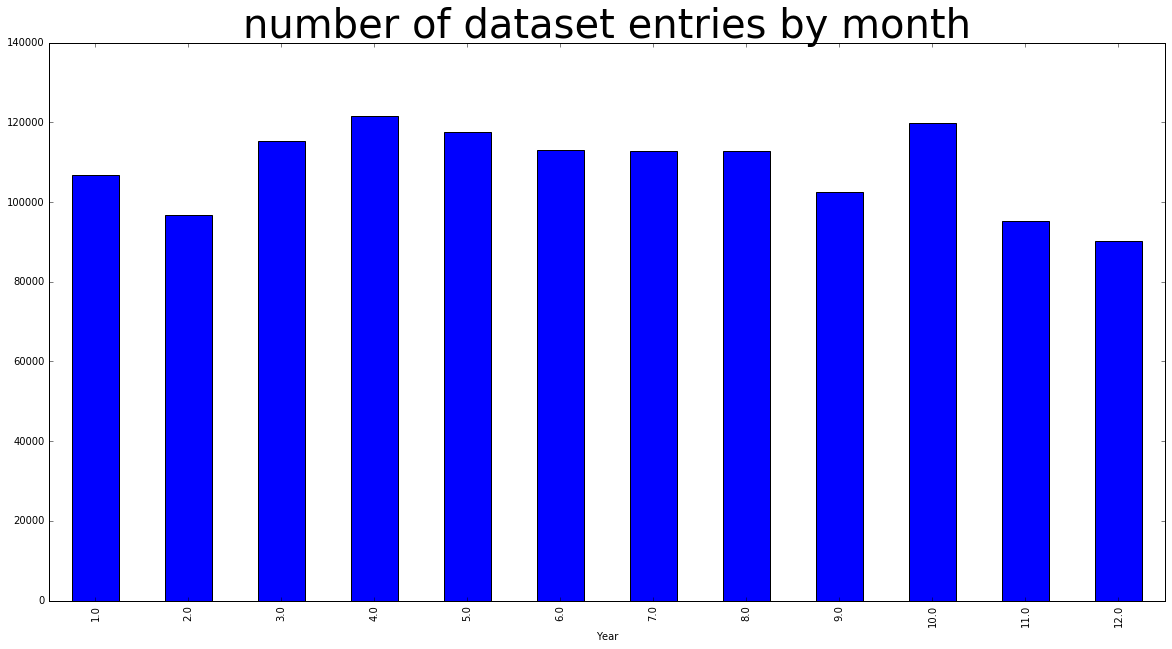

In [20]:
# how many crimes per month?
df["Year"].groupby([df.Year.dt.month]).size().plot(kind="bar",figsize=(20,10), title="number of dataset entries by month")
fig = plt.gcf()
fig.axes[0].title.set_size(40)

In [21]:
# february and december have had fewer crimes.
# maybe because february is shorter and december has more holidays?

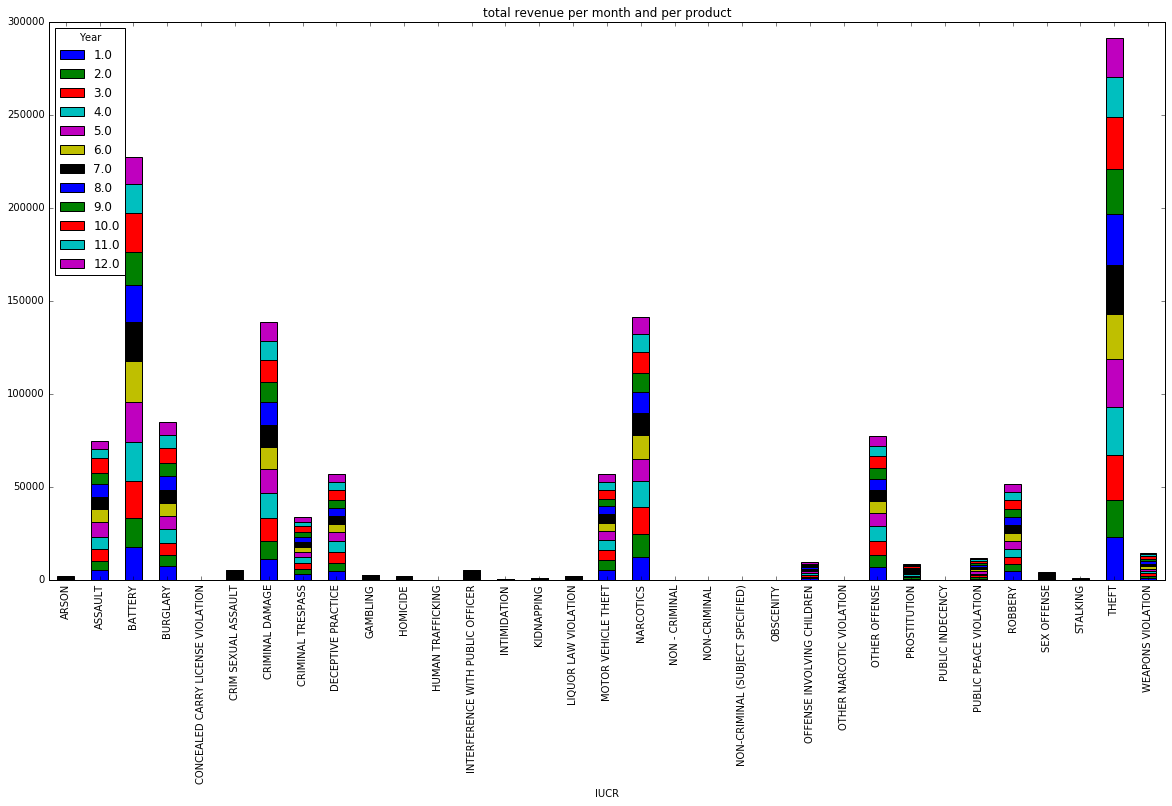

In [33]:
# how many crimes, per month, per IUCR?
df.groupby([df.IUCR, df.Year.dt.month]).size().unstack().plot(kind='bar',stacked=True,figsize=(20,10))

In [34]:
# theft and battery are the largest ones throughout

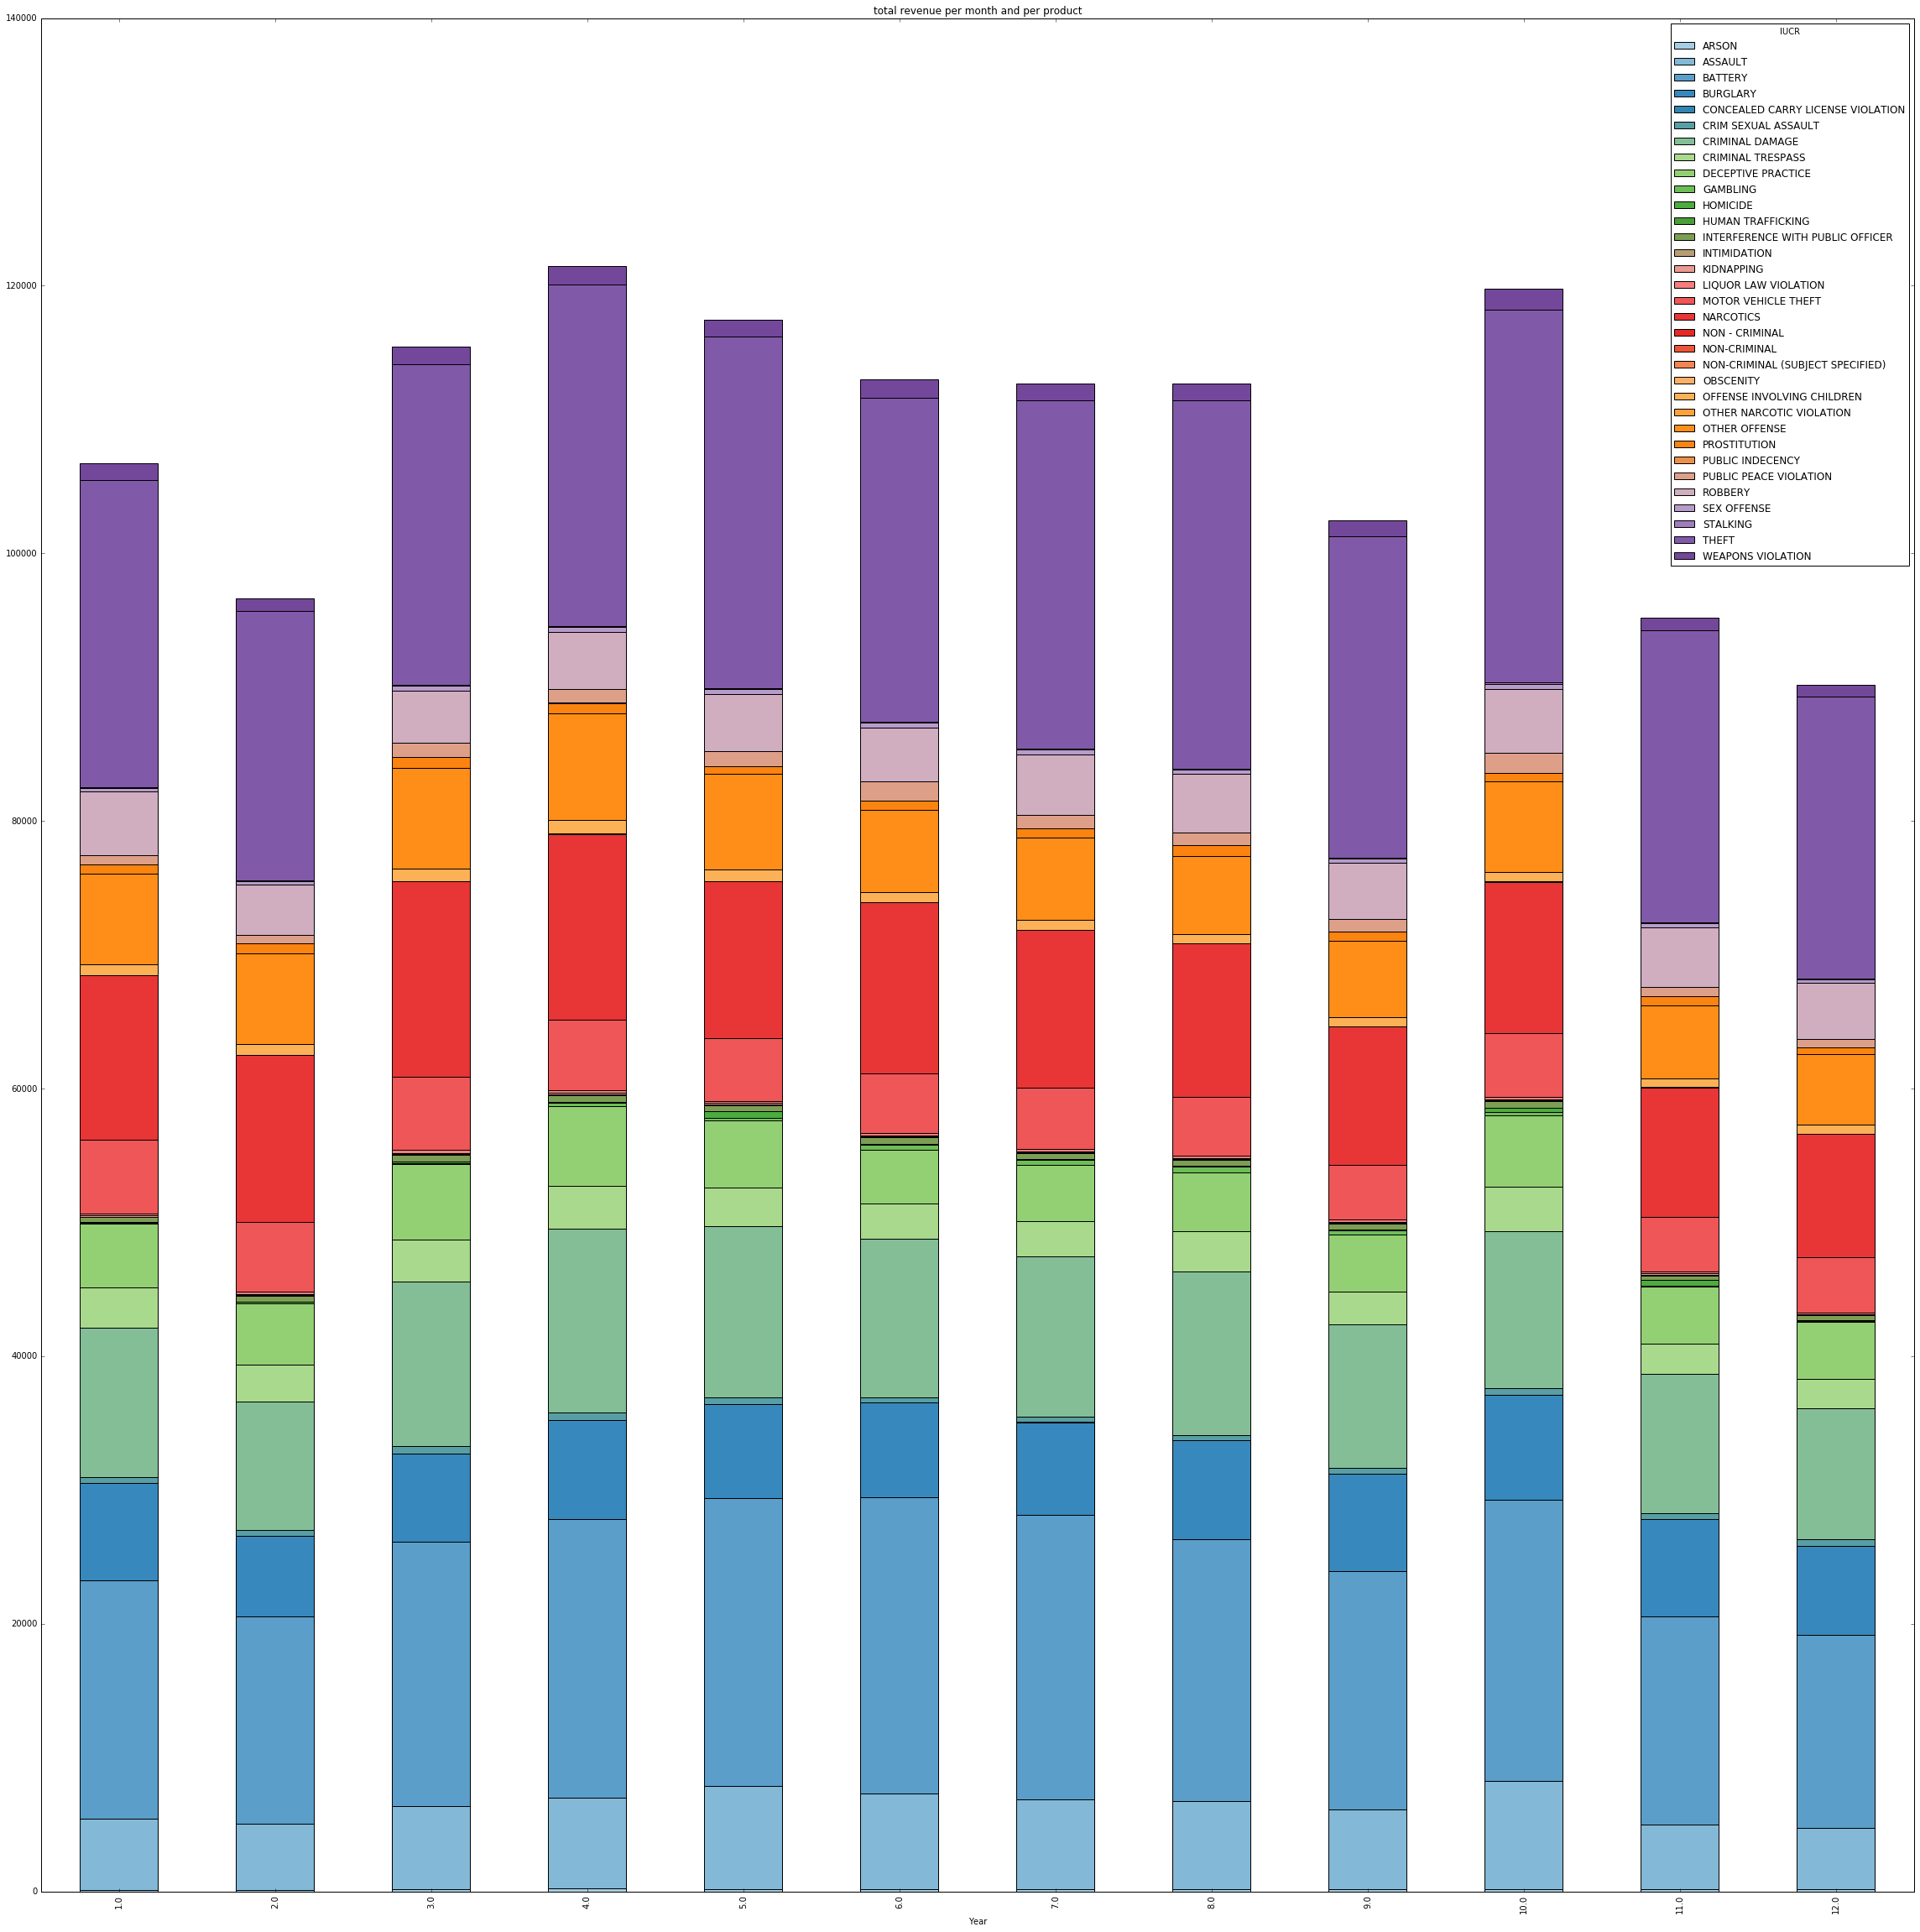

In [44]:
# the other way around: how many crimes, per IUCR, per MONTH
# need more colors
colors = plt.cm.Paired(np.linspace(0, 1, 40))

df.groupby([df.Year.dt.month,df.IUCR]).size().unstack().plot(kind='bar',stacked=True,figsize=(40,40), color=colors)

In [45]:
# it's worth noting that there are three IUCRs that are probably the same. (NON-CRIMINAL, NON - CRIMINAL, 
# and NON-CRIMINAL (SUBJECT-SPECIFIED)) - adding them up would make it a major category

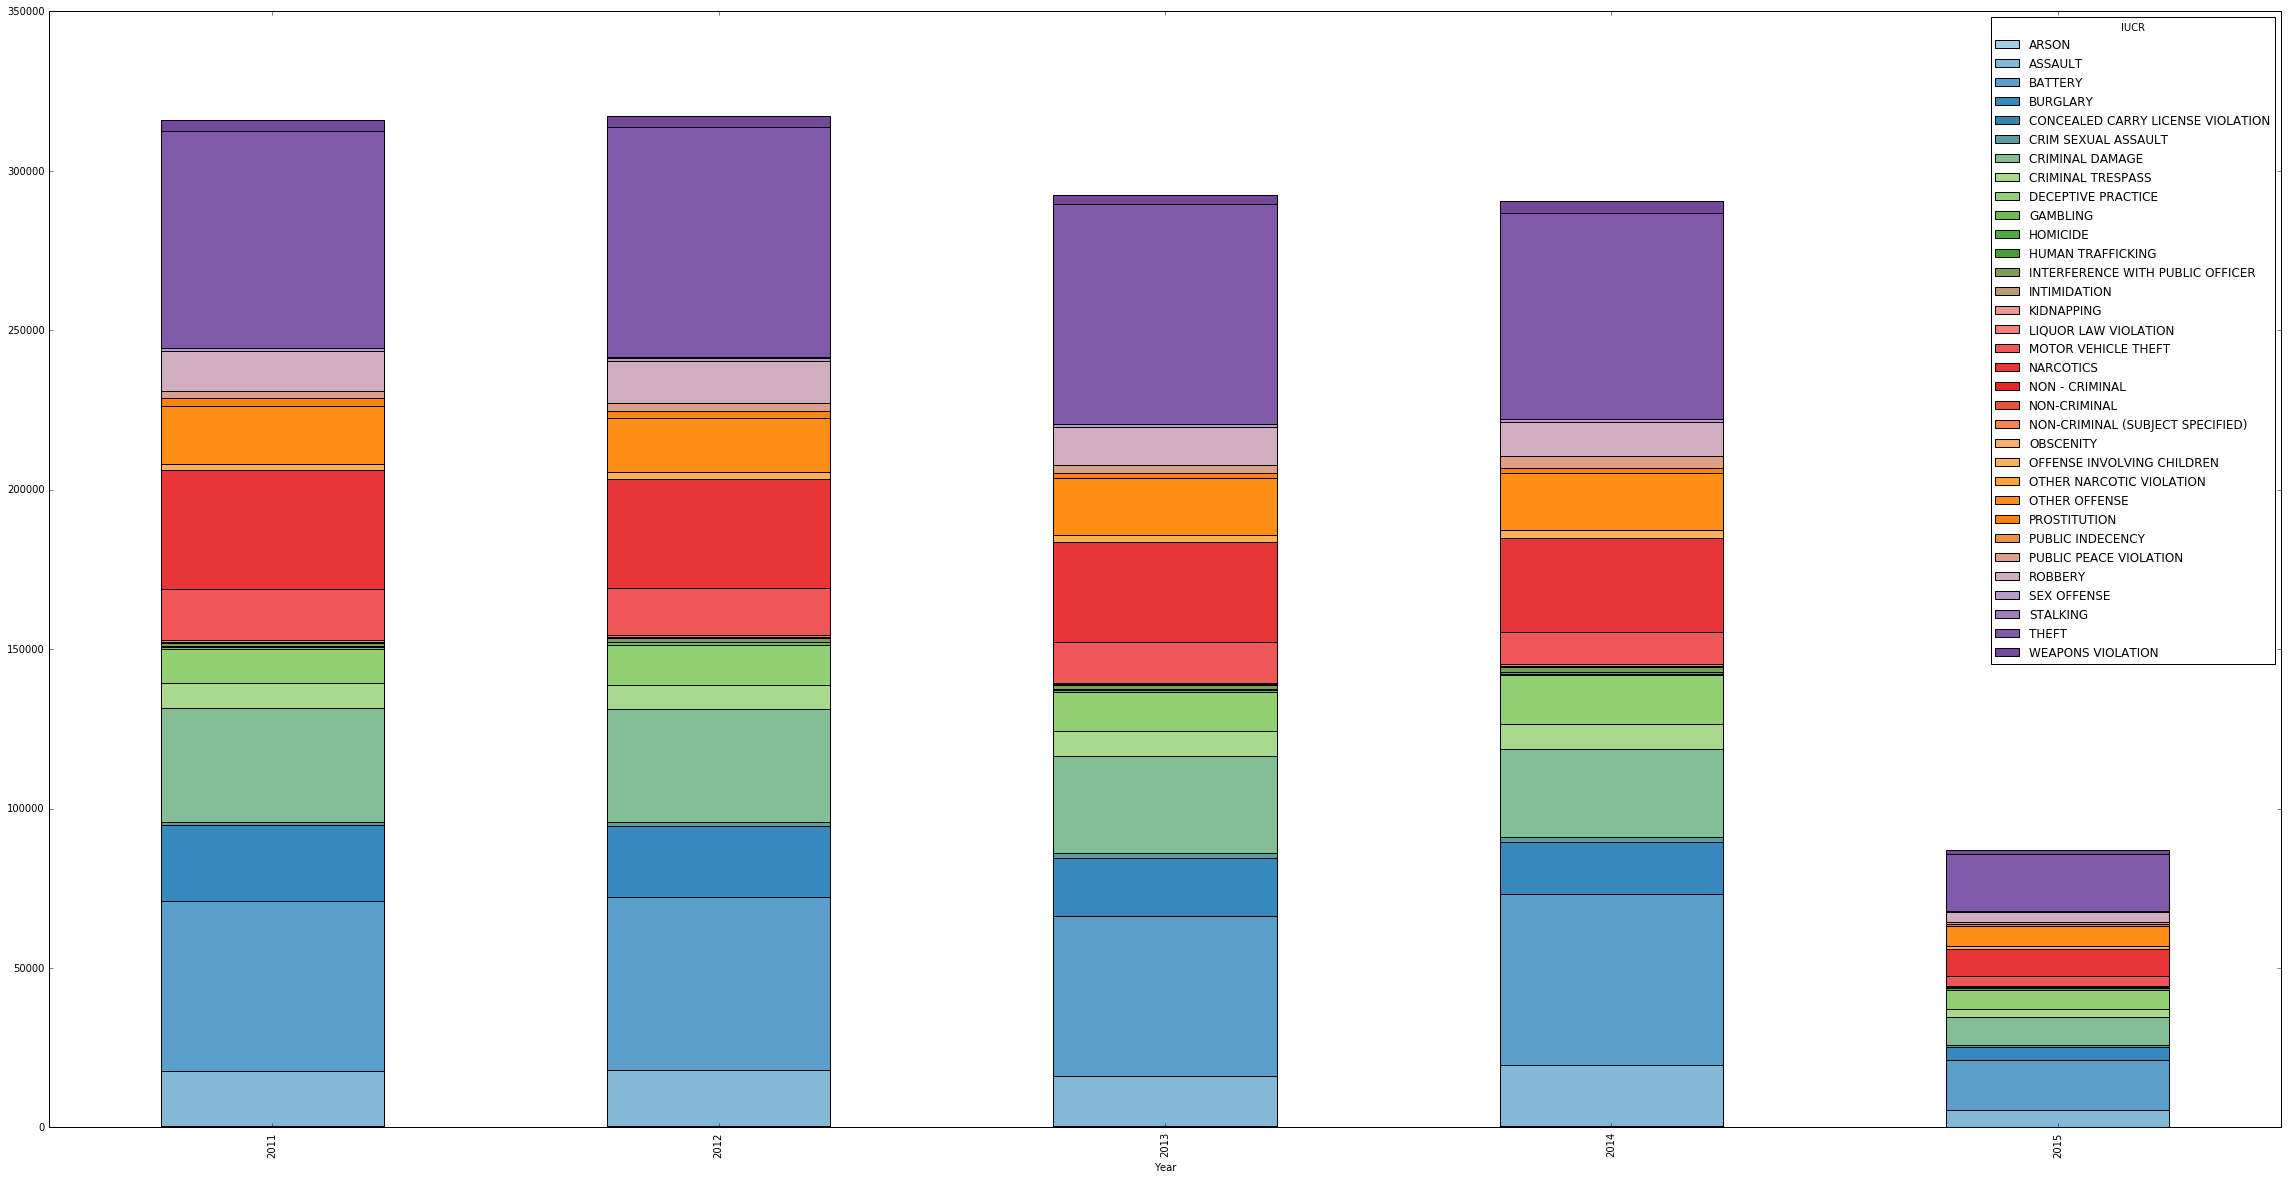

In [56]:
# how many crimes, per IUCR, per YEAR ?

df.groupby([df.Year.dt.year,df.IUCR]).size().unstack().plot(kind='bar',stacked=True,figsize=(40,20), color=colors)

In [53]:
# note: crimes seemed to have dropped as a whole, not just a few categories
# note: there are some random datapoints in 2001 and 2002 as well. they are probably noise. i'll take them out.

df = df[df.Year.dt.year > 2010]

In [54]:
df["Year"].describe()

count                 1303100
unique                 920308
top       2014-10-31 03:20:56
freq                    18176
first     2011-01-01 01:51:30
last      2015-05-12 12:42:01
Name: Year, dtype: object

other things, questions that are worth asking to get a high-level view:

- what types of crimes (IUCR) have had the largest (relative, or percentage) drop/rise year on year?

- what locations (Community.Area) have had the largest (relative, or percentage) drop/rise year on year?


## question 2

In [126]:
# to cluster districts by crimes, I will represent each district as a vector with the counts for each crime 
# that happened in there

# but District is a floating point number
# how many different Districts are there?
districts = df.District.unique()

# ok so even though it's a float it's probably a categorical column

# remove NaNs because they may be noise
not_nans = np.invert(np.isnan(districts))

districts = districts[not_nans]
districts

array([ 17.,   9.,  26.,   6.,  43.,  28.,  35.,  27.,  45.,  23.,  48.,
        38.,   7.,  34.,  42.,  37.,  44.,  15.,  22.,  11.,  46.,  20.,
        50.,  16.,   5.,   8.,  40.,  30.,  18.,  14.,  36.,  21.,  39.,
        32.,   1.,  47.,   2.,  29.,  24.,  25.,   4.,  19.,  33.,   3.,
        31.,  12.,  10.,  49.,  41.,  13.])

In [107]:

# we need this because some districts may not have had all types of crime
# in which case the vector would not match the others
# (they need to be in the same order too)
all_iucrs = df["IUCR"].unique()

all_iucrs.sort()

all_iucrs

array(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
       'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'ROBBERY', 'SEX OFFENSE', 'STALKING',
       'THEFT', 'WEAPONS VIOLATION'], dtype=object)

In [118]:
district_vectors = []

for district_index in districts:
    
    iucrs = df[df["District"] == district_index].groupby("IUCR")["IUCR"]
    
    vector = []
    
    for iucr_name in all_iucrs:
        
        # if there's a key error, it means this district has had no crimes of this IUCR code
        try:
            count = len(iucrs.get_group(iucr_name))
        except KeyError:
            count = 0
            
        vector.append(count)    
     
    district_vectors.append(vector)
        

In [122]:
X = np.vstack(district_vectors)
X.shape

(50, 33)

In [124]:
# we normalize it to prevent large absolute values from affecting more
sc = preprocessing.MinMaxScaler()
X_scaled = sc.fit_transform(X)

/home/felipe/tf-venv3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [129]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_scaled)
kmeans.cluster_centers_

array([[ 0.24246988,  0.16862496,  0.13985198,  0.23488367,  0.140625  ,
         0.20694124,  0.25852757,  0.11596351,  0.08180516,  0.01520497,
         0.14105505,  0.03125   ,  0.06276483,  0.28340517,  0.24744898,
         0.34809783,  0.33114388,  0.04620808,  0.140625  ,  0.09765625,
         0.0625    ,  0.34375   ,  0.31133178,  0.09375   ,  0.2246132 ,
         0.04969484,  0.11458333,  0.208625  ,  0.18620937,  0.17963287,
         0.1722561 ,  0.10192487,  0.10181025],
       [ 0.63052209,  0.73713158,  0.63685102,  0.65400645,  0.33333333,
         0.7265745 ,  0.78690544,  0.41476832,  0.14144381,  0.34468339,
         0.69469929,  0.22222222,  0.40936911,  0.52490421,  0.57369615,
         0.27149758,  0.72615795,  0.32251545,  0.16666667,  0.02083333,
         0.05555556,  0.49074074,  0.85237106,  0.11111111,  0.71227749,
         0.1987021 ,  0.11111111,  0.60311111,  0.66823879,  0.3951049 ,
         0.3102981 ,  0.17405026,  0.62097721]])

what I would do if I had more time

- try to project the points into a lower dimensionality to see whether they make sense and whether we can get any insight from looking at it

- use other clustering methods

- use cluster metrics (such as entropy) to see whether the clusters are good at splitting the data.

## question 3

general strategy for a quick model: 

1) extract features, train

  - every date becomes: number of days from today
   - this is because the "test set" is the next 6 months (from the end of the dataset), so we don't have data in that time frame, but if we consider the number of days from today, we still get some generalization and will be able to spot trends
  
  - districts are one hot encoded
  - murders are encoded with a 1 if IUCR=='HOMICIDE', 0 otherwise
  
2) at inference time, generate rows with all districts and murder == 1, for the 6 months. (6 x 50 == 300 so it's not much data) then we run a simple algorithm like Logistic Regression and get the probability, for each (district, month) that murder == 1. Then we select the district with the highest probability.

In [131]:
# extract features and try out a simple model just to get some results quickly

# one-hot-encode categorical features
districts = pd.get_dummies(df["District"])

## DID NOT FINISH

1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  11.0  \
10060004     0     0     0     0     0     0     0     0     0     0     0   
10059982     0     0     0     0     0     0     0     0     1     0     0   
10059953     0     0     0     0     0     0     0     0     0     0     0   
10060015     0     0     0     0     0     0     0     0     0     0     0   
10059944     0     0     0     0     0     1     0     0     0     0     0   
10059939     0     0     0     0     0     0     0     0     0     0     0   
10059946     0     0     0     0     0     0     0     0     0     0     0   
10060610     0     0     0     0     0     0     0     0     0     0     0   
10060003     0     0     0     0     0     0     0     0     0     0     0   
10059990     0     0     0     0     0     0     0     0     0     0     0   
10059996     0     0     0     0     0     0     0     0     1     0     0   
10059932     0     0     0     0     0     0     0     0     0     0     0   
10059981     0     0     0     0     0     0     0     0     0     0     0   
10066377     0     0     0     0     0     0     0     0     0     0     0   
10059964     0     0     0     0     0     0     0     0     0     0     0   
10060179     0     0     0     0     0     0     0     0     0     0     0   
10059942     0     0     0     0     0     0     1     0     0     0     0   
10059920     0     0     0     0     0     0     0     0     0     0     0   
10066591     0     0     0     0     0     0     0     0     0     0     0   
10060000     0     0     0     0     0     0     0     0     0     0     0   
10064683     0     0     0     0     0     0     0     0     0     0     0   
10059958     0     0     0     0     0     0     0     0     0     0     0   
10059923     0     0     0     0     0     0     0     0     0     0     0   
10059913     0     0     0     0     0     1     0     0     0     0     0   
10059937     0     0     0     0     0     0     0     0     0     0     1   
10060842     0     0     0     0     0     0     0     0     0     0     0   
10064039     0     0     0     0     0     0     0     0     0     0     0   
10060634     0     0     0     0     0     0     0     0     0     0     0   
10060010     0     0     0     0     0     0     0     0     0     0     0   
10060108     0     0     0     0     0     1     0     0     0     0     0   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
8357523      0     0     0     0     0     0     0     0     0     1     0   
7872290      0     0     0     0     0     0     0     0     0     0     0   
8337112      0     0     0     0     0     0     0     1     0     0     0   
7883802      0     0     0     0     0     0     0     0     0     0     0   
7870014      0     0     0     0     0     0     0     0     0     0     0   
7975148      0     0     0     0     0     0     0     0     0     0     0   
7946770      0     0     0     0     0     0     0     1     0     0     0   
7954231      0     0     0     0     0     0     0     1     0     0     0   
7884437      0     0     0     0     0     0     0     0     0     0     0   
7924630      0     0     0     0     0     0     0     0     0     0     0   
7869839      0     0     0     0     0     0     0     0     0     0     0   
7869931      0     0     0     0     0     0     0     0     0     0     0   
7937117      0     0     0     0     0     0     0     0     0     0     0   
7969847      0     0     0     0     0     0     0     0     0     0     0   
7959627      0     0     0     0     0     0     0     0     0     0     0   
7899649      0     0     0     0     0     0     0     0     0     0     0   
7915825      0     0     0     0     0     0     0     0     0     0     0   
7876160      0     0     0     0     0     0     0     0     0     0     0   
7869860      0     0     0     0     0     0     0     0     0     0     0   
7944287      0     0     0     0